# Lecture 16- Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

From the last lab, here are the column names for the SUSY Data:

In [2]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))
FeatureNames

['M_R',
 'M_Delta_R',
 'MT2',
 'cos_theta_r1',
 'axial_MET',
 'M_TR_2',
 'S_R',
 'MET_rel',
 'dPhi_r_b',
 'R']

Let's not download the data again... just use the copy we have in lab 7.

In [3]:
!ls -lh ../../Labs/Lab.7

total 5148104
-rw-r--r--@ 1 afarbin  staff   389K Oct 18 13:46 Lab.7.ipynb
-rw-r--r--@ 1 afarbin  staff   5.8M Oct 18 12:45 Lab.7.pdf
-rw-r--r--@ 1 afarbin  staff   228M Oct 18 12:39 SUSY-small.csv
-rw-r--r--  1 afarbin  staff   2.2G Oct 18 13:43 SUSY.csv


How much data? Let's count the lines in the CSV file

In [4]:
!wc ../../Labs/Lab.7/SUSY.csv

 5000000 5000000 2390277560 ../../Labs/Lab.7/SUSY.csv


Just to make things go faster, lets create a smaller file with 10% of the data.

In [5]:
!head -500000 ../../Labs/Lab.7/SUSY.csv > SUSY-Small.csv

Now load it with Pandas:

In [6]:
filename="SUSY-Small.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [7]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.0,0.719035,1.091879,0.291540,1.205962,-1.599117,-1.139445,0.424546,1.154849,0.637185,-0.091178,1.972156,0.697028,0.313636,0.988602,1.981573,0.744828,1.095080,0.006546
499996,1.0,0.910016,-0.364544,-0.777120,0.543648,-0.910632,-1.723707,2.864673,1.458272,2.176558,-0.590911,0.673695,1.662140,2.189362,1.195041,0.910815,1.181893,1.252362,0.826035
499997,1.0,0.842954,0.332476,-1.048564,1.347989,0.320496,-0.666358,0.450433,-0.411872,0.293407,0.630491,0.859920,0.403371,0.416258,0.591989,0.372003,0.716788,0.366991,0.265798
499998,0.0,1.370760,-1.162912,0.893499,2.118091,1.248496,-0.887211,0.164659,0.316840,0.215165,0.280418,3.087083,0.526929,0.151467,0.308067,3.098183,0.233042,0.876216,0.000593


And separate signal and background into different DataFrames for easy reference:

In [8]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

In [9]:
print(df_sig.shape)
print(df_bkg.shape)

(229245, 19)
(270755, 19)


## Create Data Like Sample

First, lets look back to Lab 7 and try to identify one feature that seems to exhibit good separation between signal and background events. 

`M_TR_2` seems to by such variable...

Now lets try to recreate what the distribution of this variable in real data coming from the accelerator would look like. Remember that the data we are using now is simulated, not real. And it was created in a way that we have roughly the same number of signal and background events, and lots of them. 

In the real data, we would expect very different mixture of signal and background events. Let's imagine we expected 100 background events and 10 signal events. We can use the simulated data to estimate what the distribution of `M_TR_2` may look like in real data.

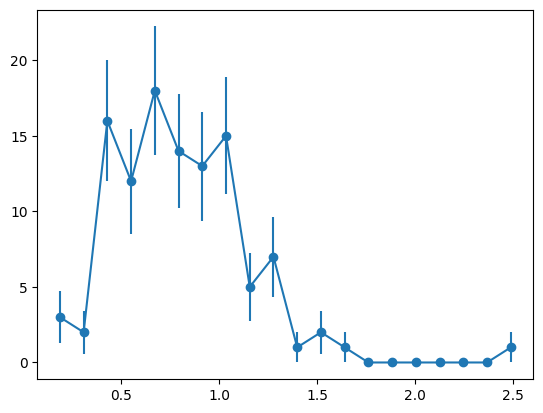

In [10]:
import math
n_bkg_expected = 100
n_sig_expected = 10

# Mix signal and background events:
data = df_sig[:n_sig_expected]["M_TR_2"].tolist()+df_bkg[:n_bkg_expected]["M_TR_2"].tolist()

# Histogram the data
c , bin_edges= np.histogram(data,bins=20)

# Correctly compute the errors on each bin
# Each bin obey Poisson statistics, which means 
# that the standard deviation can be approximated 
# as the sqrt of the mean value
error    = np.sqrt(c)

# Now we need to plot everything together...
# Unfortunately it's not so pretty in Matplotlib
bin_width = bin_edges[1]-bin_edges[0]
bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])

plt.errorbar(bin_centers, c, yerr=error, marker="o")
plt.show()

## Obtain Probability Density Functions from Simulation

Now lets use the simulation to see what the probability distributions of `M_TR_2` looks like for the signal and background. Note that we are really wanting to see the Probability Distribution Functions (PDFs). `matplotlib` histogram function plots PDFs for us by specifying `density=1`. In order to understand what density means, lets use `numpy` and do the computation ourselves.

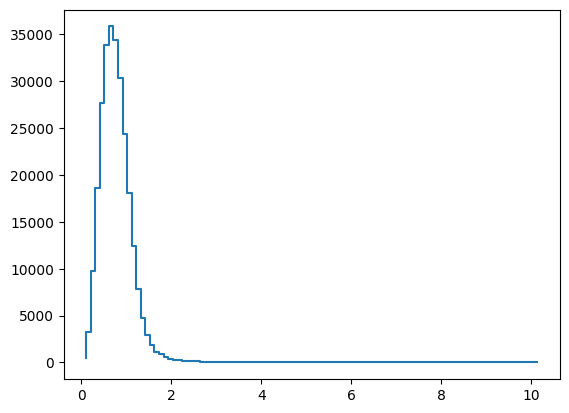

In [11]:
# Signal Histogram
c_bkg_sim, sim_bin = np.histogram(df_bkg["M_TR_2"],bins=100) 
plt.step(sim_bin[1:],c_bkg_sim)

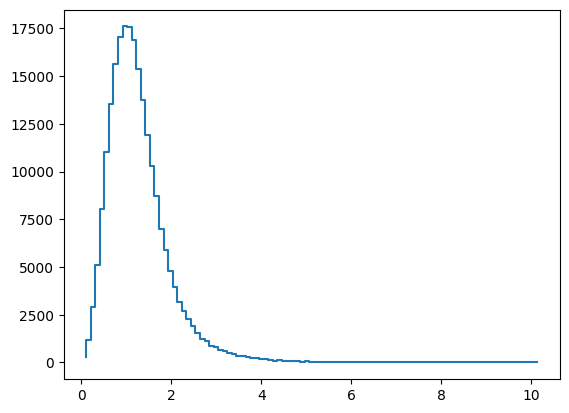

In [12]:
# Background Histogram
c_sig_sim, sim_bin = np.histogram(df_sig["M_TR_2"],bins=sim_bin)
plt.step(sim_bin[1:],c_sig_sim)

We now need to scale the `y`-axis correctly such that the area under the curve is 1. We'll take one further step here and actually normalize the the expected number of events.

Bin size: 0.10117358507588506
Integral: 270755
N Bkg Expected: 100
Normalized Integral: 100.0000000000001


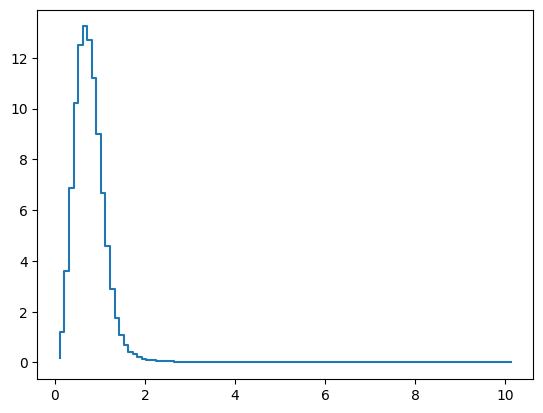

In [13]:
# Starting with background this time...
# Compute the bin size
bin_size_sim = sim_bin[1]-sim_bin[0]
print("Bin size:",bin_size_sim)

# Compute the integral
integral = sum(c_bkg_sim)
print("Integral:",integral)
print("N Bkg Expected:",n_bkg_expected)

# Divide the counts by the integral and multiply by expected number
c_bkg_sim_normalized = (n_bkg_expected / integral ) * c_bkg_sim
plt.step(sim_bin[1:],c_bkg_sim_normalized)
print("Normalized Integral:",sum(c_bkg_sim_normalized))

Repeat for the signal:

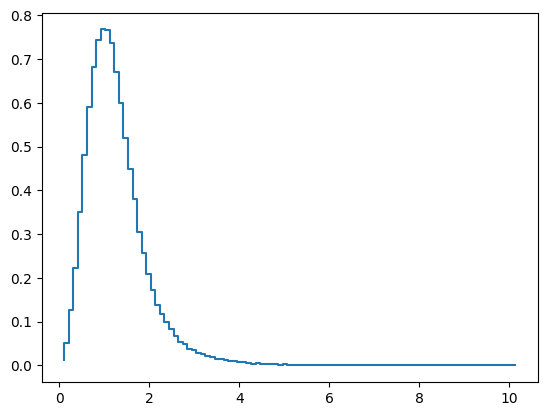

In [14]:
integral = sum(c_sig_sim) 
c_sig_sim_normalized = (n_sig_expected / integral ) * c_sig_sim
plt.step(sim_bin[1:],c_sig_sim_normalized)

## Combine to Compare Data and Simulation

Now lets plot everything together...

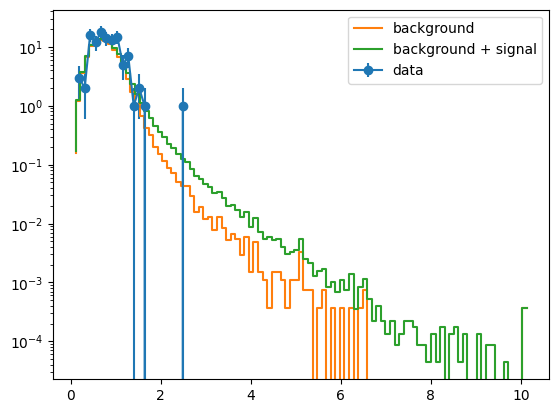

In [15]:
plt.errorbar(bin_centers, c, yerr=error, marker="o",label="data")
plt.yscale("log")
plt.step(sim_bin[1:],c_bkg_sim_normalized,label="background")
plt.step(sim_bin[1:],(c_bkg_sim_normalized+c_sig_sim_normalized),label="background + signal")
plt.legend()
plt.show()

## Calculate TPR / FPR

Next we want to think about how we could use this feature to alter counting of signal and backgrounds in a way that is most favorable to signal. As we see, signal events have larger values of our feature, so if we select events with high values of this feature, we'll be left with a sample with a more favorable signal to background ratio. Now the question is, what threshold value should we select?

First, lets compute the probability of signal and background passing the "threshold cut", as function of where we place the "cut". These probabilties are know as the True Positive Rate (TPR) and False Positive Rate (FPR).

To to this, we have to integrate (actually just count) from the threshold to postive infinity:

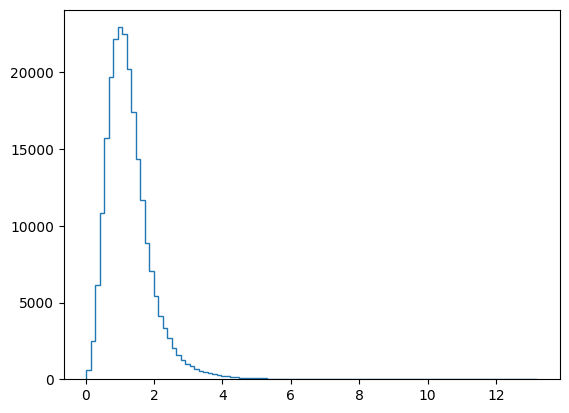

In [16]:
# Plot the signal distribution
_=plt.hist(df_sig["M_TR_2"],bins=100,histtype="step")

We can just count and sum above a selected threshold... this operation is referred to as a cumlative sum. 

`matplotlib` will actually do this in one step using the `cumulative` argument:  

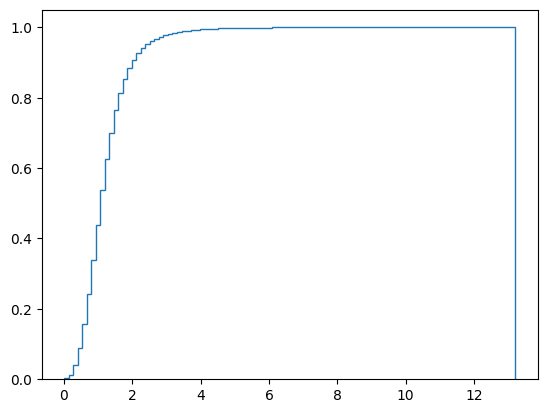

In [17]:
TPR,bins_sig,_=plt.hist(df_sig["M_TR_2"],bins=100,histtype="step",cumulative=1,density=True)

That's not right... it's going the wrong direction... try again:

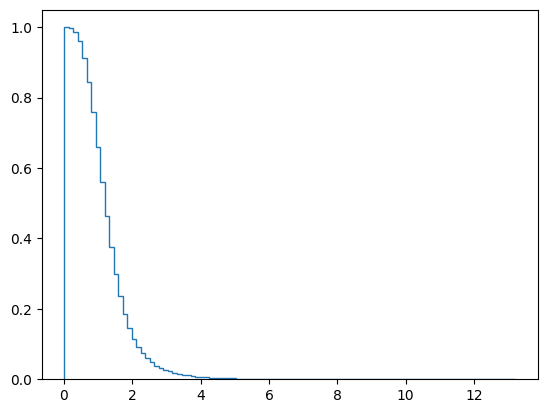

In [18]:
TPR,bins_sig,_=plt.hist(df_sig["M_TR_2"],bins=100,histtype="step",cumulative=-1,density=True)

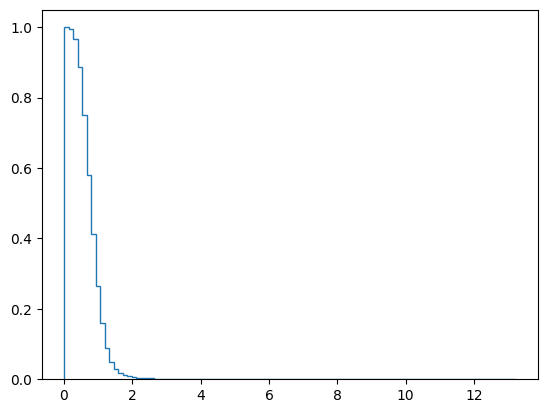

In [19]:
FPR,bins_sig,_=plt.hist(df_bkg["M_TR_2"],bins=bins_sig,histtype="step",cumulative=-1,density=True)

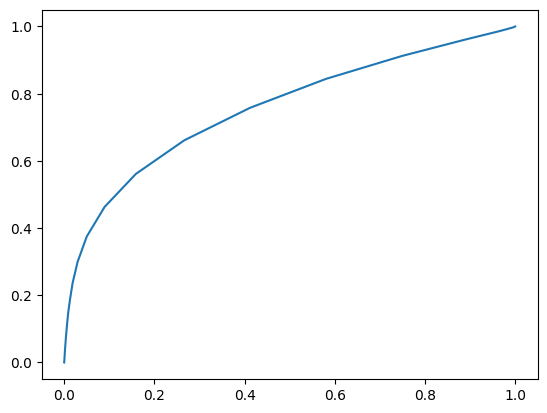

In [20]:
plt.plot(FPR,TPR)

## Compute Significance

Now that we now the FPR and TPR, we can compute the statistical significance of a counting experiment after selection above a threshod of our feature.

Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

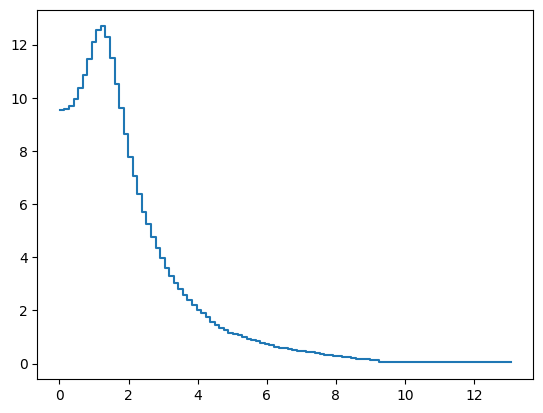

In [21]:
n_bkg_expected = 10000
n_sig_expected = 1000

n_sig_expected_prime = n_sig_expected * TPR
n_bkg_expected_prime = n_bkg_expected * FPR

sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
plt.step(bins_sig[:-1],sig)

In [22]:
bins_sig[np.argmax(sig)]

1.3321864132769405

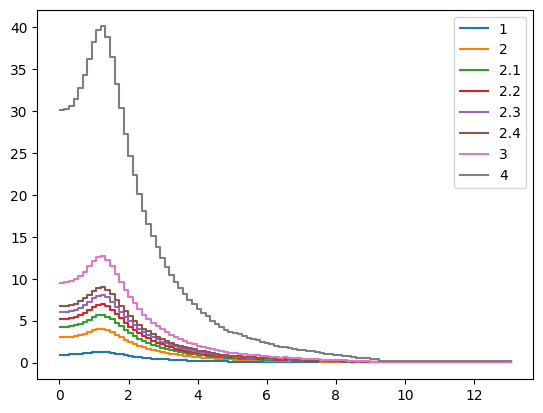

{'1': (10,
  3.7493947523392004,
  4.989067486112752,
  1.2683632796320354,
  1.3321864132769405),
 '2': (10,
  37.493947523392,
  49.89067486112753,
  4.010916864158284,
  1.3321864132769405),
 '2.1': (10,
  74.987895046784,
  99.78134972225506,
  5.672293026843611,
  1.3321864132769405),
 '2.2': (10,
  112.481842570176,
  149.67202458338258,
  6.947111793656985,
  1.3321864132769405),
 '2.3': (10,
  149.975790093568,
  199.56269944451012,
  8.021833728316569,
  1.3321864132769405),
 '2.4': (10,
  187.46973761696,
  249.45337430563762,
  8.968682760358215,
  1.3321864132769405),
 '3': (10,
  374.93947523392,
  498.90674861127525,
  12.683632796320355,
  1.3321864132769405),
 '4': (10,
  3749.3947523392003,
  4989.067486112753,
  40.10916864158285,
  1.3321864132769405)}

In [23]:
scenarios = { "1": (10,100), 
              "2": (100,1000),
              "2.1": (200,2000),
              "2.2": (300,3000),
              "2.3": (400,4000),
              "2.4": (500,5000),
              "3": (1000,10000),
              "4": (10000,100000)
            }

def compare_significance(scenarios,log=False):
    max_sigs=dict()
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name)
    
        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,
                        n_sig_expected_prime[max_i],
                        n_bkg_expected_prime[max_i],
                        sig[max_i],
                        bins_sig[max_i])
        
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()
    
    return max_sigs

max_sigs = compare_significance(scenarios)
max_sigs

In [24]:
max_sigs.keys()

dict_keys(['1', '2', '2.1', '2.2', '2.3', '2.4', '3', '4'])

In [25]:
list(zip(max_sigs.keys(),*max_sigs.values()))

[('1', 10, 10, 10, 10, 10, 10, 10, 10),
 ('2',
  3.7493947523392004,
  37.493947523392,
  74.987895046784,
  112.481842570176,
  149.975790093568,
  187.46973761696,
  374.93947523392,
  3749.3947523392003),
 ('2.1',
  4.989067486112752,
  49.89067486112753,
  99.78134972225506,
  149.67202458338258,
  199.56269944451012,
  249.45337430563762,
  498.90674861127525,
  4989.067486112753),
 ('2.2',
  1.2683632796320354,
  4.010916864158284,
  5.672293026843611,
  6.947111793656985,
  8.021833728316569,
  8.968682760358215,
  12.683632796320355,
  40.10916864158285),
 ('2.3',
  1.3321864132769405,
  1.3321864132769405,
  1.3321864132769405,
  1.3321864132769405,
  1.3321864132769405,
  1.3321864132769405,
  1.3321864132769405,
  1.3321864132769405)]

In [26]:
from IPython.display import HTML, display
import tabulate
display(HTML(tabulate.tabulate(max_sigs.values(), 
                               tablefmt='html',
                               headers=["bin i",'N sig','N bkg','sig','x_c'])))

bin i,N sig,N bkg,sig,x_c
10,3.74939,4.98907,1.26836,1.33219
10,37.4939,49.8907,4.01092,1.33219
10,74.9879,99.7813,5.67229,1.33219
10,112.482,149.672,6.94711,1.33219
10,149.976,199.563,8.02183,1.33219
10,187.47,249.453,8.96868,1.33219
10,374.939,498.907,12.6836,1.33219
10,3749.39,4989.07,40.1092,1.33219


In [27]:
def compare_significance(scenarios,log=False):
    max_sigs=dict()
    table=list()
    
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name+" "+str((n_sig_expected, n_bkg_expected)))
    
        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i])
        table.append((name,n_sig_expected, n_bkg_expected, 
                      TPR[max_i],FPR[max_i],
                      n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i],max_i)
        )
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()
    
    display(HTML(tabulate.tabulate(table, tablefmt='html',
                                   headers=["Name",'N sig','N bkg',"TPR","FPR","N sig'","N bkg'",'sig','x_c',"bin i"])))
    return max_sigs



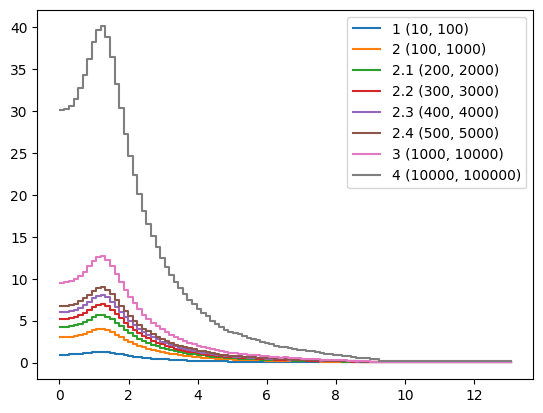

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.374939,0.0498907,3.74939,4.98907,1.26836,1.33219,10
2,100,1000,0.374939,0.0498907,37.4939,49.8907,4.01092,1.33219,10
2.1,200,2000,0.374939,0.0498907,74.9879,99.7813,5.67229,1.33219,10
2.2,300,3000,0.374939,0.0498907,112.482,149.672,6.94711,1.33219,10
2.3,400,4000,0.374939,0.0498907,149.976,199.563,8.02183,1.33219,10
2.4,500,5000,0.374939,0.0498907,187.47,249.453,8.96868,1.33219,10
3,1000,10000,0.374939,0.0498907,374.939,498.907,12.6836,1.33219,10
4,10000,100000,0.374939,0.0498907,3749.39,4989.07,40.1092,1.33219,10


In [28]:
scenarios = { "1": (10,100), 
              "2": (100,1000),
              "2.1": (200,2000),
              "2.2": (300,3000),
              "2.3": (400,4000),
              "2.4": (500,5000),
              "3": (1000,10000),
              "4": (10000,100000)
            }
_=compare_significance(scenarios)

## Generalize

This function above isn't general, in the sense that it relies on various objects we computed before it (namely TPR and FPR). Lets generalize to get a function that can make a similar plot for any observeable. 

One problem is that we are using `matplotlib` to compute the TPR/FPR, eventhough we never plot it. Let's instead compute it with `numpy`:


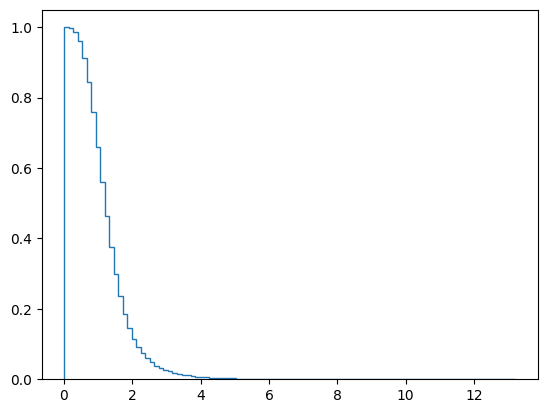

In [29]:
# Matplotlib
TPR,bins_sig,_=plt.hist(df_sig["M_TR_2"],bins=100,histtype="step",cumulative=-1,density=True)

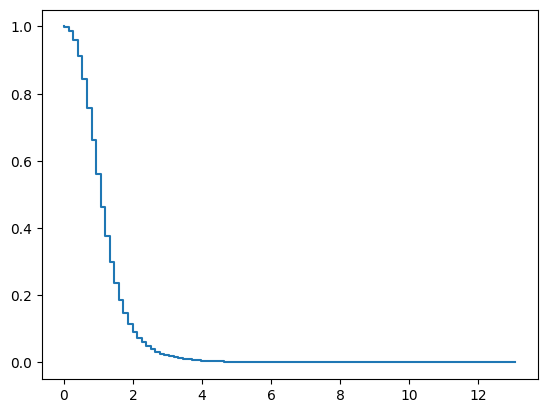

In [30]:
# compute with numpy
hist,bins_sig=np.histogram(df_sig["M_TR_2"],bins=100,density=True)
TPR = np.cumsum(hist[::-1])[::-1] * (bins_sig[1]-bins_sig[0])

# plot with matplotlib
plt.step(bins_sig[:-1],TPR)
plt.show()

Lets write this into a function:

In [31]:
def compute_rate(d,bins=100):
    hist,bins_=np.histogram(d,bins=bins,density=True)
    R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0])
    return R,bins_


Note that this function only works for the first possible selection criteria (from your lab):

1. $x > x_c$
2. $x < x_c$
3. $|x - x_0| > x_c$
4. $|x - x_0| < x_c$

And actually, scenarios 3 and 4 are more challenging to implement.

Now put it all together:

In [32]:
def compare_significance(df_sig, df_bkg,
                         obs_name,
                         scenarios,bins=100,log=False):
        
    TPR,bins_sig = compute_rate(df_sig[obs_name],bins=bins)
    FPR,bins_sig = compute_rate(df_bkg[obs_name],bins=bins_sig)
    
    max_sigs=dict()
    table=list()
    
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name+" "+str((n_sig_expected, n_bkg_expected)))
    
        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i])
        table.append((name,n_sig_expected, n_bkg_expected, 
                      TPR[max_i],FPR[max_i],
                      n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i],max_i)
        )
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()
    
    display(HTML(tabulate.tabulate(table, tablefmt='html',
                                   headers=["Name",'N sig','N bkg',"TPR","FPR","N sig'","N bkg'",'sig','x_c',"bin i"])))
    return max_sigs


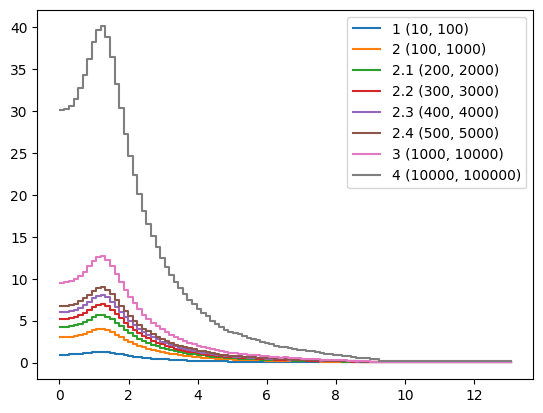

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.374939,0.0498907,3.74939,4.98907,1.26836,1.33219,10
2,100,1000,0.374939,0.0498907,37.4939,49.8907,4.01092,1.33219,10
2.1,200,2000,0.374939,0.0498907,74.9879,99.7813,5.67229,1.33219,10
2.2,300,3000,0.374939,0.0498907,112.482,149.672,6.94711,1.33219,10
2.3,400,4000,0.374939,0.0498907,149.976,199.563,8.02183,1.33219,10
2.4,500,5000,0.374939,0.0498907,187.47,249.453,8.96868,1.33219,10
3,1000,10000,0.374939,0.0498907,374.939,498.907,12.6836,1.33219,10
4,10000,100000,0.374939,0.0498907,3749.39,4989.07,40.1092,1.33219,10


In [33]:
scenarios = { "1": (10,100), 
              "2": (100,1000),
              "2.1": (200,2000),
              "2.2": (300,3000),
              "2.3": (400,4000),
              "2.4": (500,5000),
              "3": (1000,10000),
              "4": (10000,100000)
            }
_=compare_significance(df_sig,df_bkg,"M_TR_2",scenarios)

In [34]:
my_obs= ['MET',
 'MET_phi',
 'MET_rel',
 'axial_MET',
 'M_R',
 'M_TR_2',
 'R',
 'MT2',
 'S_R',
 'M_Delta_R',
 'dPhi_r_b',
 'cos_theta_r1']

MET


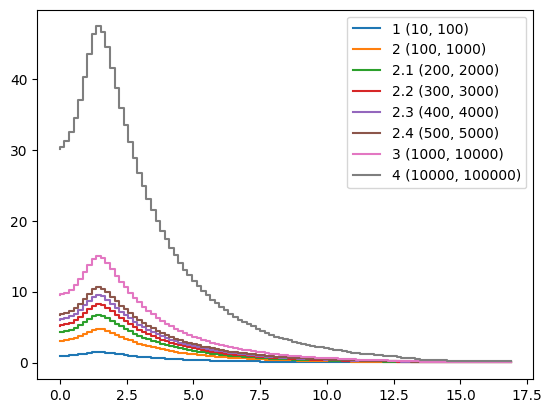

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.32676,0.0148142,3.2676,1.48142,1.49943,1.53595,9
2,100,1000,0.32676,0.0148142,32.676,14.8142,4.74162,1.53595,9
2.1,200,2000,0.32676,0.0148142,65.3519,29.6284,6.70566,1.53595,9
2.2,300,3000,0.32676,0.0148142,98.0279,44.4426,8.21272,1.53595,9
2.3,400,4000,0.32676,0.0148142,130.704,59.2567,9.48324,1.53595,9
2.4,500,5000,0.32676,0.0148142,163.38,74.0709,10.6026,1.53595,9
3,1000,10000,0.32676,0.0148142,326.76,148.142,14.9943,1.53595,9
4,10000,100000,0.32676,0.0148142,3267.6,1481.42,47.4162,1.53595,9


MET_phi


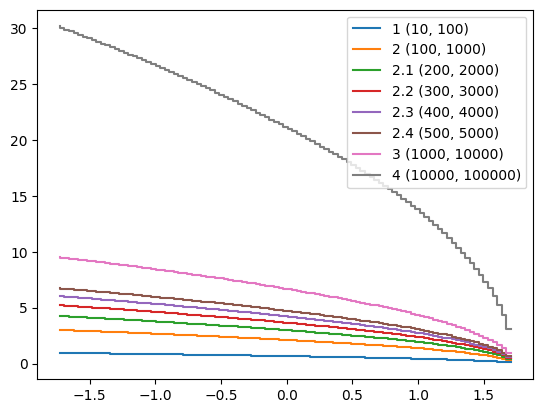

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,-1.72711,0
2,100,1000,1,1,100,1000,3.01511,-1.72711,0
2.1,200,2000,1,1,200,2000,4.26401,-1.72711,0
2.2,300,3000,1,1,300,3000,5.22233,-1.72711,0
2.3,400,4000,1,1,400,4000,6.03023,-1.72711,0
2.4,500,5000,1,1,500,5000,6.742,-1.72711,0
3,1000,10000,1,1,1000,10000,9.53463,-1.72711,0
4,10000,100000,1,1,10000,100000,30.1511,-1.72711,0


MET_rel


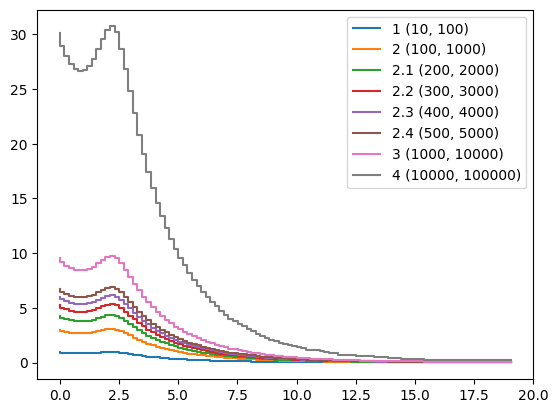

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.146559,0.00809957,1.46559,0.809957,0.971561,2.30909,12
2,100,1000,0.146559,0.00809957,14.6559,8.09957,3.07235,2.30909,12
2.1,200,2000,0.146559,0.00809957,29.3119,16.1991,4.34495,2.30909,12
2.2,300,3000,0.146559,0.00809957,43.9678,24.2987,5.32146,2.30909,12
2.3,400,4000,0.146559,0.00809957,58.6237,32.3983,6.14469,2.30909,12
2.4,500,5000,0.146559,0.00809957,73.2797,40.4979,6.86998,2.30909,12
3,1000,10000,0.146559,0.00809957,146.559,80.9957,9.71561,2.30909,12
4,10000,100000,0.146559,0.00809957,1465.59,809.957,30.7235,2.30909,12


axial_MET


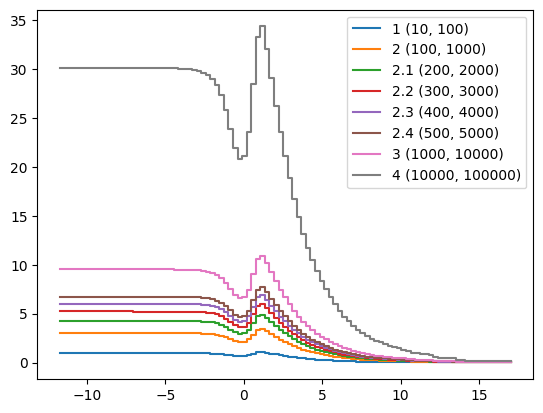

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.13647,0.00211261,1.3647,0.211261,1.08709,1.34388,45
2,100,1000,0.13647,0.00211261,13.647,2.11261,3.43767,1.34388,45
2.1,200,2000,0.13647,0.00211261,27.2939,4.22522,4.8616,1.34388,45
2.2,300,3000,0.13647,0.00211261,40.9409,6.33783,5.95422,1.34388,45
2.3,400,4000,0.13647,0.00211261,54.5879,8.45044,6.87534,1.34388,45
2.4,500,5000,0.13647,0.00211261,68.2349,10.5631,7.68686,1.34388,45
3,1000,10000,0.13647,0.00211261,136.47,21.1261,10.8709,1.34388,45
4,10000,100000,0.13647,0.00211261,1364.7,211.261,34.3767,1.34388,45


M_R


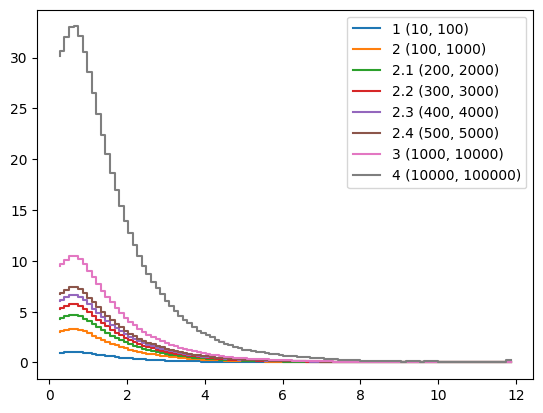

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.749936,0.439256,7.49936,43.9256,1.04577,0.741439,4
2,100,1000,0.749936,0.439256,74.9936,439.256,3.30702,0.741439,4
2.1,200,2000,0.749936,0.439256,149.987,878.512,4.67683,0.741439,4
2.2,300,3000,0.749936,0.439256,224.981,1317.77,5.72793,0.741439,4
2.3,400,4000,0.749936,0.439256,299.974,1757.02,6.61404,0.741439,4
2.4,500,5000,0.749936,0.439256,374.968,2196.28,7.39472,0.741439,4
3,1000,10000,0.749936,0.439256,749.936,4392.56,10.4577,0.741439,4
4,10000,100000,0.749936,0.439256,7499.36,43925.6,33.0702,0.741439,4


M_TR_2


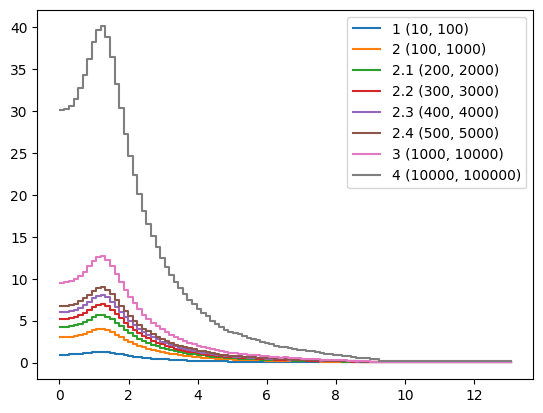

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.374939,0.0498907,3.74939,4.98907,1.26836,1.33219,10
2,100,1000,0.374939,0.0498907,37.4939,49.8907,4.01092,1.33219,10
2.1,200,2000,0.374939,0.0498907,74.9879,99.7813,5.67229,1.33219,10
2.2,300,3000,0.374939,0.0498907,112.482,149.672,6.94711,1.33219,10
2.3,400,4000,0.374939,0.0498907,149.976,199.563,8.02183,1.33219,10
2.4,500,5000,0.374939,0.0498907,187.47,249.453,8.96868,1.33219,10
3,1000,10000,0.374939,0.0498907,374.939,498.907,12.6836,1.33219,10
4,10000,100000,0.374939,0.0498907,3749.39,4989.07,40.1092,1.33219,10


R


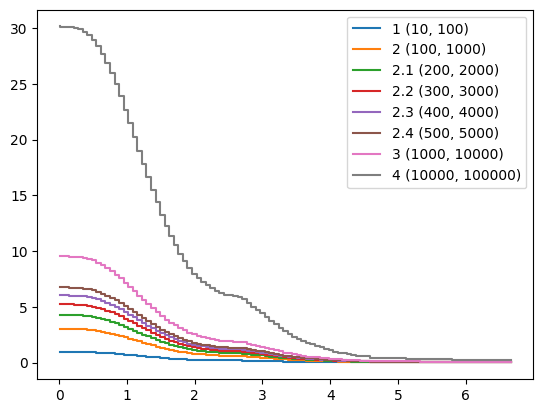

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0.0110889,0
2,100,1000,1,1,100,1000,3.01511,0.0110889,0
2.1,200,2000,1,1,200,2000,4.26401,0.0110889,0
2.2,300,3000,1,1,300,3000,5.22233,0.0110889,0
2.3,400,4000,1,1,400,4000,6.03023,0.0110889,0
2.4,500,5000,1,1,500,5000,6.742,0.0110889,0
3,1000,10000,1,1,1000,10000,9.53463,0.0110889,0
4,10000,100000,1,1,10000,100000,30.1511,0.0110889,0


MT2


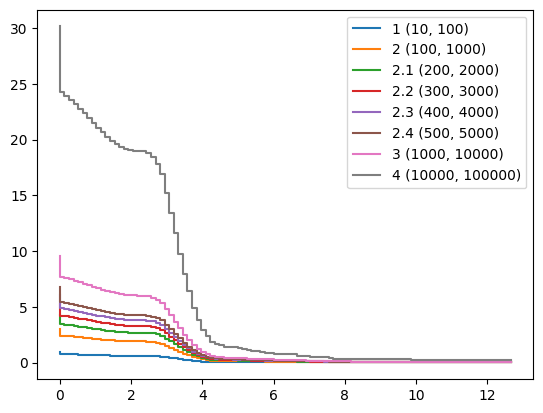

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0,0
2,100,1000,1,1,100,1000,3.01511,0,0
2.1,200,2000,1,1,200,2000,4.26401,0,0
2.2,300,3000,1,1,300,3000,5.22233,0,0
2.3,400,4000,1,1,400,4000,6.03023,0,0
2.4,500,5000,1,1,500,5000,6.742,0,0
3,1000,10000,1,1,1000,10000,9.53463,0,0
4,10000,100000,1,1,10000,100000,30.1511,0,0


S_R


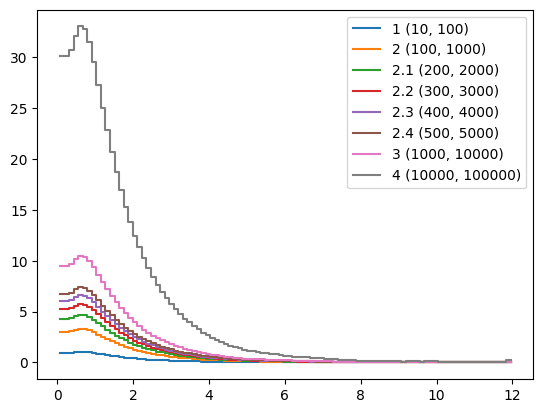

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.82438,0.54024,8.2438,54.024,1.04471,0.667132,5
2,100,1000,0.82438,0.54024,82.438,540.24,3.30366,0.667132,5
2.1,200,2000,0.82438,0.54024,164.876,1080.48,4.67208,0.667132,5
2.2,300,3000,0.82438,0.54024,247.314,1620.72,5.72211,0.667132,5
2.3,400,4000,0.82438,0.54024,329.752,2160.96,6.60732,0.667132,5
2.4,500,5000,0.82438,0.54024,412.19,2701.2,7.38721,0.667132,5
3,1000,10000,0.82438,0.54024,824.38,5402.4,10.4471,0.667132,5
4,10000,100000,0.82438,0.54024,8243.8,54024,33.0366,0.667132,5


M_Delta_R


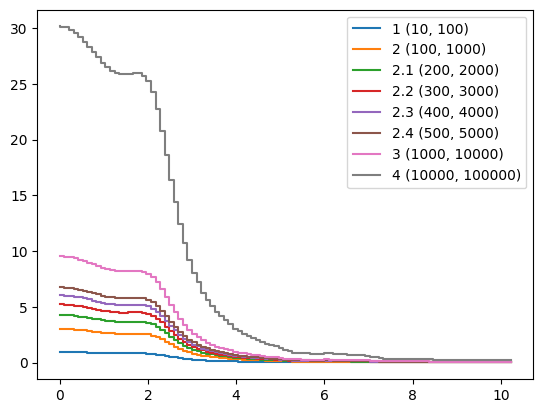

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0.00445562,0
2,100,1000,1,1,100,1000,3.01511,0.00445562,0
2.1,200,2000,1,1,200,2000,4.26401,0.00445562,0
2.2,300,3000,1,1,300,3000,5.22233,0.00445562,0
2.3,400,4000,1,1,400,4000,6.03023,0.00445562,0
2.4,500,5000,1,1,500,5000,6.742,0.00445562,0
3,1000,10000,1,1,1000,10000,9.53463,0.00445562,0
4,10000,100000,1,1,10000,100000,30.1511,0.00445562,0


dPhi_r_b


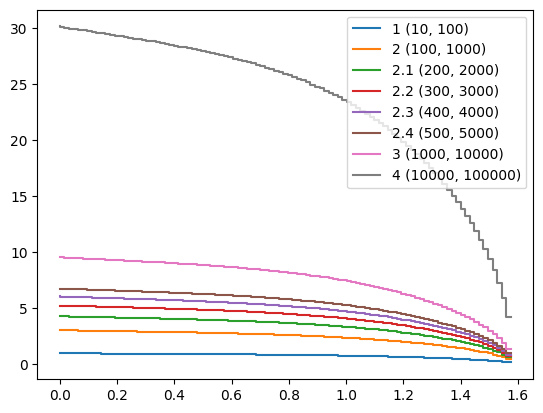

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,8.22401e-06,0
2,100,1000,1,1,100,1000,3.01511,8.22401e-06,0
2.1,200,2000,1,1,200,2000,4.26401,8.22401e-06,0
2.2,300,3000,1,1,300,3000,5.22233,8.22401e-06,0
2.3,400,4000,1,1,400,4000,6.03023,8.22401e-06,0
2.4,500,5000,1,1,500,5000,6.742,8.22401e-06,0
3,1000,10000,1,1,1000,10000,9.53463,8.22401e-06,0
4,10000,100000,1,1,10000,100000,30.1511,8.22401e-06,0


cos_theta_r1


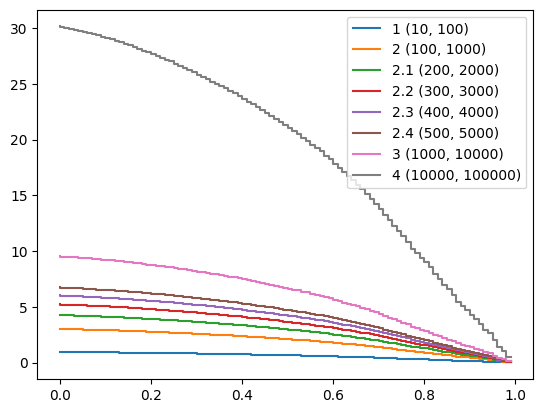

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,3.52031e-07,0
2,100,1000,1,1,100,1000,3.01511,3.52031e-07,0
2.1,200,2000,1,1,200,2000,4.26401,3.52031e-07,0
2.2,300,3000,1,1,300,3000,5.22233,3.52031e-07,0
2.3,400,4000,1,1,400,4000,6.03023,3.52031e-07,0
2.4,500,5000,1,1,500,5000,6.742,3.52031e-07,0
3,1000,10000,1,1,1000,10000,9.53463,3.52031e-07,0
4,10000,100000,1,1,10000,100000,30.1511,3.52031e-07,0


In [35]:
for obs in my_obs:
    print(obs)
    _=compare_significance(df_sig,df_bkg,obs,scenarios)
    

## Making Selections

Recall that with Pandas, you can select a subset of your data:

In [36]:
df_sig["M_TR_2"]>1.35029

1         False
2         False
3         False
4         False
8          True
          ...  
499988    False
499991    False
499994    False
499996     True
499997    False
Name: M_TR_2, Length: 229245, dtype: bool

Some basic checks:

In [37]:
sum(df_sig["M_TR_2"]>1.35029)

83371

In [38]:
df_sig.shape

(229245, 19)

In [39]:
sum(df_sig["M_TR_2"]>1.35029)/df_sig.shape[0]

0.363676416061419

Now lets select on one variable and look how the significance changes:

In [40]:
df_sig_1 = df_sig[df_sig["M_TR_2"]>1.35029]
df_bkg_1 = df_bkg[df_bkg["M_TR_2"]>1.35029]

In [41]:
print(df_sig_1.shape)
print(df_bkg_1.shape)

(83371, 19)
(12495, 19)


In [42]:
scenarios

{'1': (10, 100),
 '2': (100, 1000),
 '2.1': (200, 2000),
 '2.2': (300, 3000),
 '2.3': (400, 4000),
 '2.4': (500, 5000),
 '3': (1000, 10000),
 '4': (10000, 100000)}

In [43]:
eff_s = df_sig_1.shape[0]/df_sig.shape[0] # TPR
eff_b = df_bkg_1.shape[0]/df_bkg.shape[0] # FPR

print(eff_s,eff_b)

0.363676416061419 0.04614873224871194


In [44]:
scenarios_1 =dict(zip(scenarios.keys(),map(lambda x: (eff_s*x[0],eff_b*x[1]),scenarios.values())))
scenarios_1

{'1': (3.63676416061419, 4.614873224871194),
 '2': (36.3676416061419, 46.14873224871194),
 '2.1': (72.7352832122838, 92.29746449742387),
 '2.2': (109.10292481842569, 138.44619674613583),
 '2.3': (145.4705664245676, 184.59492899484775),
 '2.4': (181.8382080307095, 230.7436612435597),
 '3': (363.676416061419, 461.4873224871194),
 '4': (3636.7641606141897, 4614.873224871194)}

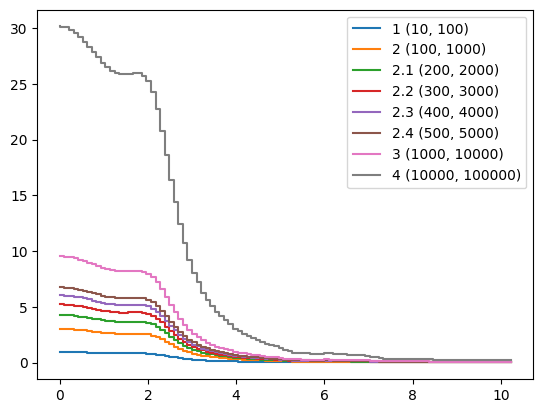

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0.00445562,0
2,100,1000,1,1,100,1000,3.01511,0.00445562,0
2.1,200,2000,1,1,200,2000,4.26401,0.00445562,0
2.2,300,3000,1,1,300,3000,5.22233,0.00445562,0
2.3,400,4000,1,1,400,4000,6.03023,0.00445562,0
2.4,500,5000,1,1,500,5000,6.742,0.00445562,0
3,1000,10000,1,1,1000,10000,9.53463,0.00445562,0
4,10000,100000,1,1,10000,100000,30.1511,0.00445562,0


In [45]:
_=compare_significance(df_sig,df_bkg,"M_Delta_R",scenarios)

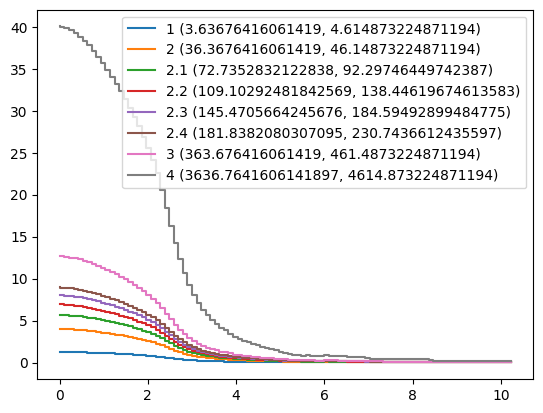

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,3.63676,4.61487,1,1,3.63676,4.61487,1.26603,0.00687303,0
2,36.3676,46.1487,1,1,36.3676,46.1487,4.00355,0.00687303,0
2.1,72.7353,92.2975,1,1,72.7353,92.2975,5.66187,0.00687303,0
2.2,109.103,138.446,1,1,109.103,138.446,6.93435,0.00687303,0
2.3,145.471,184.595,1,1,145.471,184.595,8.0071,0.00687303,0
2.4,181.838,230.744,1,1,181.838,230.744,8.95221,0.00687303,0
3,363.676,461.487,1,1,363.676,461.487,12.6603,0.00687303,0
4,3636.76,4614.87,1,1,3636.76,4614.87,40.0355,0.00687303,0


In [46]:
_=compare_significance(df_sig_1,df_bkg_1,"M_Delta_R",scenarios_1)

# Other Considerations


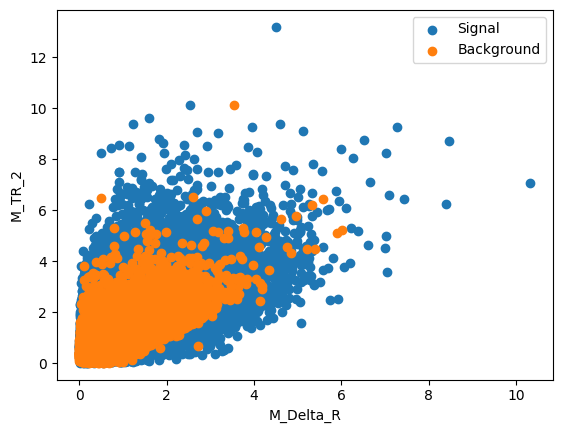

In [47]:
plt.scatter(df_sig["M_Delta_R"],df_sig["M_TR_2"],label="Signal")
plt.xlabel("M_Delta_R")
plt.ylabel("M_TR_2")
plt.scatter(df_bkg["M_Delta_R"],df_bkg["M_TR_2"],label="Background")
plt.legend()

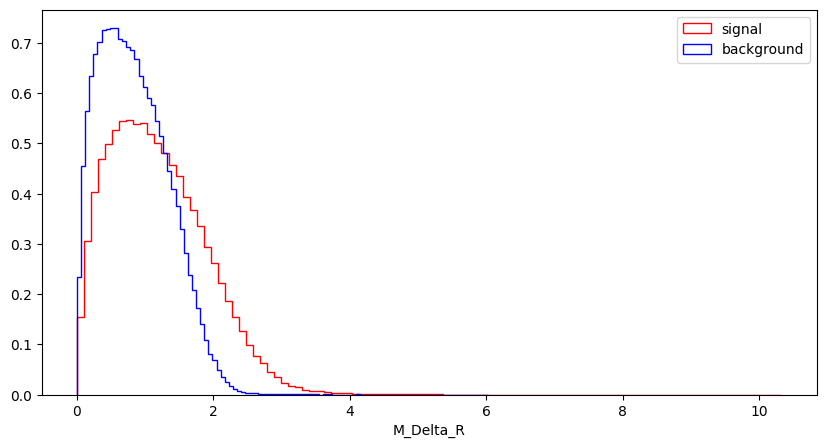

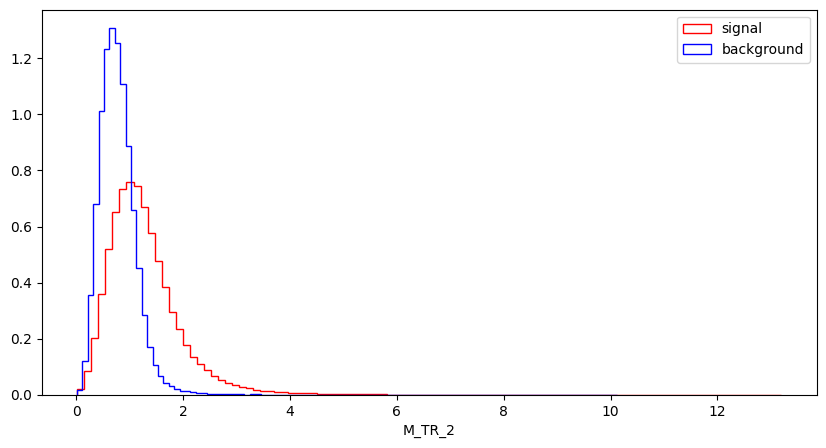

In [48]:
import numpy as np
for var in ["M_Delta_R","M_TR_2"]:
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.xlabel(var)
    plt.show()

In [49]:
TPR_1=sum(df_sig["M_Delta_R"]>2.)/df_sig.shape[0]
FPR_1=sum(df_bkg["M_Delta_R"]>2.)/df_bkg.shape[0]

print(TPR_1)
print(FPR_1)

0.1328796702218151
0.013853853114439253


In [50]:
TPR_2=sum(df_sig["M_TR_2"]>2.)/df_sig.shape[0]
FPR_2=sum(df_bkg["M_TR_2"]>2.)/df_bkg.shape[0]

print(TPR_2)
print(FPR_2)

0.1141006346921416
0.006230725194363908


In [51]:
TPR_1_2=sum(np.logical_and(df_sig["M_Delta_R"]>2., df_sig["M_TR_2"]>2.))/df_sig.shape[0]
FPR_1_2=sum(np.logical_and(df_bkg["M_Delta_R"]>2., df_bkg["M_TR_2"]>2.))/df_bkg.shape[0]

print(TPR_1_2)
print(FPR_1_2)

0.05098911644746887
0.0019390223633912577


In [52]:
print(TPR_1*TPR_2)
print(FPR_1*FPR_2)

0.01516165470999157
8.631955163915354e-05


In [53]:
display(HTML(tabulate.tabulate([[ TPR_1, TPR_2, TPR_1*TPR_2, TPR_1_2],
                                 [FPR_1, FPR_2, FPR_1*FPR_2, FPR_1_2]],
                               tablefmt='html',
                               headers=["Cut 1",'Cut 2','Cut 1 * Cut 2','Cut 1 & Cut 2'])))



Cut 1,Cut 2,Cut 1 * Cut 2,Cut 1 & Cut 2
0.13288,0.114101,0.0151617,0.0509891
0.0138539,0.00623073,8.63196e-05,0.00193902
